In [9]:
import os
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [10]:
# Loading data of train and test dataset into train_dir and test_dir directories

train_dir = 'pictures/images/train'
test_dir = 'pictures/images/test'

In [11]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "complete")
    return image_paths,labels

In [12]:
# Creating dataframe train from image_path and labels using createdataframe

train = pd.DataFrame()
image_paths, labels = createdataframe(train_dir)

train['image'] = image_paths
train['label'] = labels

angry complete
disgust complete
fear complete
happy complete
neutral complete
sad complete
surprise complete


In [13]:
print(train)

                                         image     label
0            pictures/images/train\angry\0.jpg     angry
1            pictures/images/train\angry\1.jpg     angry
2           pictures/images/train\angry\10.jpg     angry
3        pictures/images/train\angry\10002.jpg     angry
4        pictures/images/train\angry\10016.jpg     angry
...                                        ...       ...
28816  pictures/images/train\surprise\9969.jpg  surprise
28817  pictures/images/train\surprise\9985.jpg  surprise
28818  pictures/images/train\surprise\9990.jpg  surprise
28819  pictures/images/train\surprise\9992.jpg  surprise
28820  pictures/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [14]:
# Creating dataframe test from image_path and labels using createdataframe

test = pd.DataFrame()
image_paths, labels = createdataframe(test_dir)

test['image'] = image_paths
test['label'] = labels

angry complete
disgust complete
fear complete
happy complete
neutral complete
sad complete
surprise complete


In [15]:
print(test)
print(test['image'])

                                       image     label
0       pictures/images/test\angry\10052.jpg     angry
1       pictures/images/test\angry\10065.jpg     angry
2       pictures/images/test\angry\10079.jpg     angry
3       pictures/images/test\angry\10095.jpg     angry
4       pictures/images/test\angry\10121.jpg     angry
...                                      ...       ...
7061  pictures/images/test\surprise\9806.jpg  surprise
7062  pictures/images/test\surprise\9830.jpg  surprise
7063  pictures/images/test\surprise\9853.jpg  surprise
7064  pictures/images/test\surprise\9878.jpg  surprise
7065   pictures/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         pictures/images/test\angry\10052.jpg
1         pictures/images/test\angry\10065.jpg
2         pictures/images/test\angry\10079.jpg
3         pictures/images/test\angry\10095.jpg
4         pictures/images/test\angry\10121.jpg
                         ...                  
7061    pictures/images/test\surp

In [16]:
from tqdm.notebook import tqdm 

def extract_features(images):
    features = []
    for image in tqdm(images, desc = "loading images"):
        img = load_img(image,grayscale =  True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    
    return features

In [17]:
train_features = extract_features(train['image'])

loading images:   0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Kartik Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [18]:
test_features = extract_features(test['image'])

loading images:   0%|          | 0/7066 [00:00<?, ?it/s]

In [19]:
# Normalizing pixel values in traning nd testing image data 

x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
# Importing 

from sklearn.preprocessing import LabelEncoder

In [21]:
# Create an instance of calss and assign it to variable le

le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [32]:
# Creating model

model = Sequential()
# convolutional layers

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer

model.add(Dense(7, activation='softmax'))

In [33]:
# For compiling model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [27]:
# Training model

model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 399s 2s/step - loss: 1.8245 - accuracy: 0.2425 - val_loss: 1.8069 - val_accuracy: 0.2620
Epoch 2/100
226/226 [==============================] - 393s 2s/step - loss: 1.7761 - accuracy: 0.2604 - val_loss: 1.6953 - val_accuracy: 0.3031
Epoch 3/100
226/226 [==============================] - 409s 2s/step - loss: 1.6527 - accuracy: 0.3372 - val_loss: 1.5406 - val_accuracy: 0.4052
Epoch 4/100
226/226 [==============================] - 399s 2s/step - loss: 1.5374 - accuracy: 0.4014 - val_loss: 1.4059 - val_accuracy: 0.4587
Epoch 5/100
  4/226 [..............................] - ETA: 6:09 - loss: 1.4639 - accuracy: 0.4414

KeyboardInterrupt: 

In [ ]:
# To save the model 

model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [34]:
# Importing library

from keras.models import model_from_json

In [35]:
# Importing model 

json_file = open("facialemotionmodel.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [36]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [44]:
# Function to extract features from image

def ef(image):
    img = load_img(image,grayscale = True )
    feature = np.array(img)
    feature= feature.reshape(1,48,48,1)
    return feature/255.0

In [49]:
# Making prediction

image = 'pictures/images/train/fear/9.jpg'
print("original image: fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)

original image: fear
1/1 [==============================] - 0s 44ms/step
model's prediction: surprise


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

original image: happy
1/1 [==============================] - 0s 37ms/step
model's prediction: happy


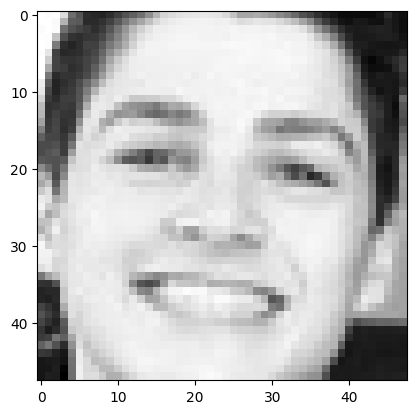

In [66]:
image = 'pictures/images/train/happy/67.jpg'
print("original image: happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: fear
1/1 [==============================] - 0s 34ms/step
model's prediction: sad


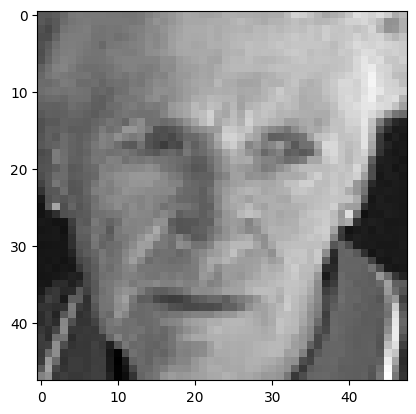

In [68]:
image = 'pictures/images/train/fear/50.jpg'
print("original image: fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: disgust
1/1 [==============================] - 0s 28ms/step
model's prediction: disgust


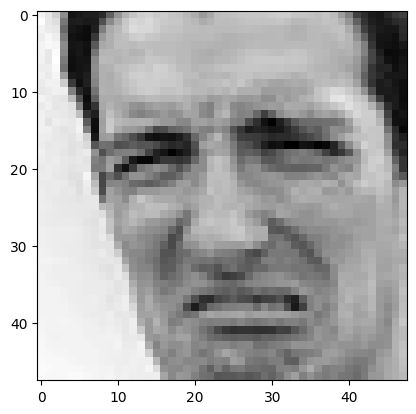

In [69]:
image = 'pictures/images/train/disgust/416.jpg'
print("original image: disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: neutral
1/1 [==============================] - 0s 25ms/step
model's prediction: neutral


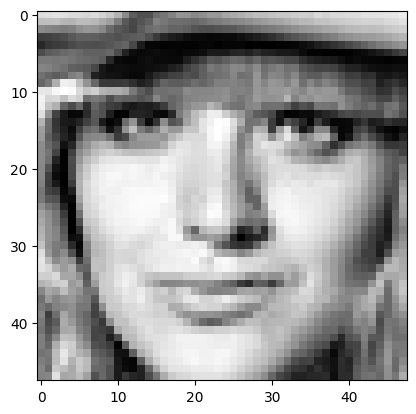

In [71]:
image = 'pictures/images/train/neutral/152.jpg'
print("original image: neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: sad
1/1 [==============================] - 0s 32ms/step
model's prediction: sad


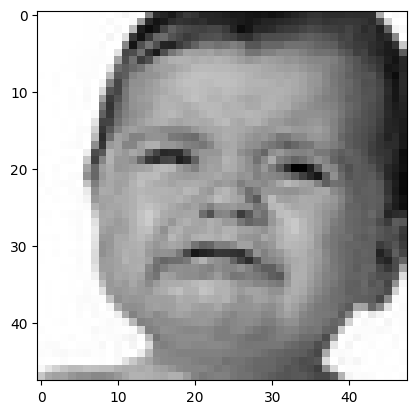

In [72]:
image = 'pictures/images/train/sad/63.jpg'
print("original image: sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: surprise
1/1 [==============================] - 0s 15ms/step
model's prediction: surprise


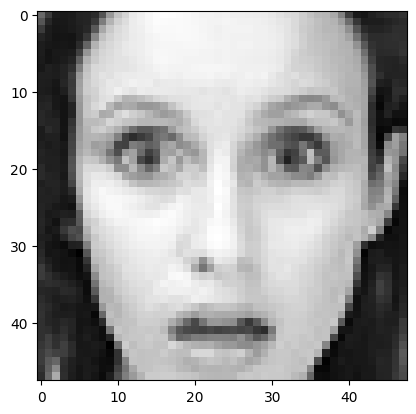

In [73]:
image = 'pictures/images/train/surprise/488.jpg'
print("original image: surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image: angry
1/1 [==============================] - 0s 17ms/step
model's prediction: neutral


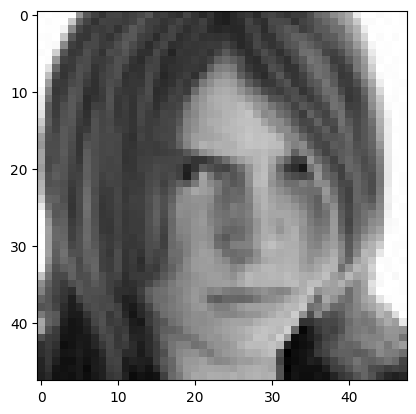

In [74]:
image = 'pictures/images/train/angry/91.jpg'
print("original image: angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model's prediction:",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')